<a href="https://colab.research.google.com/github/Avery1493/Lending-Club/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lending Club

In [1]:
# Imports 
import numpy as np
import pandas as pd
# print(pd.__version__)
# !pip freeze |grep pandas
file_1_url = "https://raw.githubusercontent.com/Avery1493/Lending-Club/master/Data/LC2019Q3_Paid_or_Charged_Off"
file_2_url = "https://raw.githubusercontent.com/Avery1493/Lending-Club/master/Data/LC2019Q4_Paid_or_Charged_Off"

In [2]:
# CURL SHELL COMMAND -- fast way to see raw contents of a file
#!curl https://raw.githubusercontent.com/Avery1493/Lending-Club/master/Data/LC2019Q3_Paid_or_Charged_Off

In [3]:
# Read in CSVs
#help(pd.read_csv)
#?pd.read_csv
df = pd.read_csv(file_1_url)
df2 = pd.read_csv(file_1_url)
print(df.shape)
print(df2.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (144,145,146) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(8409, 150)
(8409, 150)


In [4]:
# Concat dataframes
df = pd.concat([df,df2])
print(df.shape)
df.reset_index().tail(5)

(16818, 150)


,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
16813,8404,154311563,NaN,6000,6000,6000.0,36 months,20.00%,222.99,D,D2,Sales Manager,10+ years,OWN,120000.0,Not Verified,Jul-2019,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,medical,Medical expenses,707xx,LA,25.14,0,Dec-2001,705,709,0,NaN,NaN,8,0,18852,83.4%,19,w,0.0,...,0,251077,79810,17600,84477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
16814,8405,153817414,NaN,12000,12000,12000.0,60 months,15.24%,287.00,C,C2,Letter Carrier,6 years,MORTGAGE,65000.0,Not Verified,Jul-2019,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,441xx,OH,15.75,0,Dec-2006,710,714,0,31.0,NaN,8,0,1317,15.7%,18,w,0.0,...,0,143312,23919,5000,27655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
16815,8406,154053832,NaN,15000,15000,15000.0,36 months,8.81%,475.68,A,A5,NaN,NaN,MORTGAGE,42000.0,Not Verified,Jul-2019,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,741xx,OK,28.26,0,Dec-2006,775,779,0,36.0,NaN,9,0,697,4.1%,31,w,0.0,...,0,146940,32565,7000,49140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
16816,8407,154105572,NaN,10000,10000,10000.0,36 months,17.74%,360.23,C,C5,Senior financial analyst,< 1 year,MORTGAGE,110000.0,Not Verified,Jul-2019,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,134xx,NY,16.84,0,Mar-2014,665,669,0,34.0,97.0,11,1,7089,92.1%,18,f,0.0,...,0,42860,16624,6100,35160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
16817,8408,153400333,NaN,31900,31900,31900.0,36 months,17.74%,1149.11,C,C5,Regional Manager,2 years,MORTGAGE,85000.0,Source Verified,Jul-2019,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,330xx,FL,11.44,0,Oct-2002,670,674,0,40.0,39.0,5,1,748,6.2%,43,f,0.0,...,0,61688,47258,12000,49688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


#Cleaning Data


In [5]:
# Reducing features
df = df[["funded_amnt", "installment", "term", "int_rate", "emp_title", "emp_length", 
    "home_ownership", "annual_inc", "title","grade", "fico_range_high", 
    "revol_util", "mths_since_last_delinq", "loan_status"]]
df.head()

,funded_amnt,installment,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,title,grade,fico_range_high,revol_util,mths_since_last_delinq,loan_status
0,16000,325.88,60 months,8.19%,Business Agent,2 years,MORTGAGE,116000.0,Credit card refinancing,A,724,20.7%,NaN,Fully Paid
1,1800,64.84,36 months,17.74%,Utility,4 years,MORTGAGE,70000.0,Medical expenses,C,704,19.6%,23.0,Fully Paid
2,10000,324.23,36 months,10.33%,NaN,< 1 year,RENT,59300.0,Debt consolidation,B,724,8.9%,41.0,Fully Paid
3,25000,1044.93,36 months,28.80%,traffic cordinator,10+ years,MORTGAGE,80000.0,Debt consolidation,D,699,85.9%,NaN,Fully Paid
4,8000,259.38,36 months,10.33%,Processing Manager,6 years,MORTGAGE,116600.0,Debt consolidation,B,704,55%,NaN,Fully Paid


In [6]:
# Cleaning
# Fill Nans
df['emp_length'].fillna("1", inplace = True)
df['revol_util'].fillna("0%", inplace = True)

def obj_term_to_int(cell_contents):
  return int(cell_contents.strip(" months"))
def obj_rate_to_float(cell_contents):
  return float(cell_contents.strip("%"))
def obj_len_to_int(cell_contents):
  return int(cell_contents.strip(" years").strip("< ").strip("+"))
def clean_title(cell_contents):
  if isinstance(cell_contents, str):
    return cell_contents.strip().title()
  else: 
    return "Unknown"

df["term"] = df["term"].apply(obj_term_to_int)
df["int_rate"] = df["int_rate"].apply(obj_rate_to_float)
df["revol_util"] = df["revol_util"].apply(obj_rate_to_float)
df['emp_length'] = df['emp_length'].apply(obj_len_to_int)
df["emp_title"] = df["emp_title"].apply(clean_title)
df['emp_title'] = df['emp_title'].replace("Rn", "Registered Nurse")
df["annual_inc"] = df["annual_inc"]/1000

In [7]:
df.dtypes

funded_amnt                 int64
installment               float64
term                        int64
int_rate                  float64
emp_title                  object
emp_length                  int64
home_ownership             object
annual_inc                float64
title                      object
grade                      object
fico_range_high             int64
revol_util                float64
mths_since_last_delinq    float64
loan_status                object
dtype: object

In [8]:
df.describe()

,funded_amnt,installment,term,int_rate,emp_length,annual_inc,fico_range_high,revol_util,mths_since_last_delinq
count,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,7328.000000
mean,14140.923415,423.293211,42.210489,13.628699,5.549174,89.684815,716.806874,37.302925,37.587336
std,9902.307155,286.173272,10.511333,5.369850,3.721818,134.466275,38.165494,25.815071,21.984436
min,1000.000000,30.890000,36.000000,6.460000,1.000000,0.000000,664.000000,0.000000,1.000000
25%,6375.000000,213.050000,36.000000,8.810000,2.000000,50.000000,684.000000,16.300000,19.000000
50%,11500.000000,348.650000,36.000000,12.400000,5.000000,72.000000,709.000000,33.100000,35.000000
75%,20000.000000,565.640000,60.000000,16.950000,10.000000,102.304000,739.000000,55.400000,55.000000
max,40000.000000,1604.180000,60.000000,28.800000,10.000000,7272.644000,850.000000,112.800000,160.000000


In [9]:
df.describe(exclude="number")

,emp_title,home_ownership,title,grade,loan_status
count,16818,16818,16818,16818,16818
unique,3946,4,12,4,2
top,Unknown,MORTGAGE,Debt consolidation,B,Fully Paid
freq,1920,8988,8720,4972,16052


In [10]:
pd.crosstab(df["home_ownership"], df["emp_length"])

emp_length,1,2,3,4,5,6,7,8,9,10
home_ownership,,,,,,,,,,
ANY,4,0,0,0,0,0,0,0,0,0
MORTGAGE,1820,564,576,500,626,442,308,338,262,3552
OWN,600,160,160,94,126,104,80,68,48,718
RENT,1668,642,544,362,420,252,204,158,136,1282


In [11]:
df.isnull().sum()

funded_amnt                  0
installment                  0
term                         0
int_rate                     0
emp_title                    0
emp_length                   0
home_ownership               0
annual_inc                   0
title                        0
grade                        0
fico_range_high              0
revol_util                   0
mths_since_last_delinq    9490
loan_status                  0
dtype: int64

# Plots

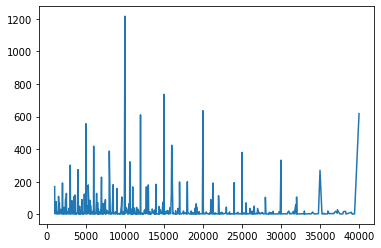

In [ ]:
#plot(kind="barh");
#plot.density()
#plot.scatter("","")
#.hist();
#pd.crosstab().plot();
# decending order / order by index 
df["funded_amnt"].value_counts().sort_index().plot();

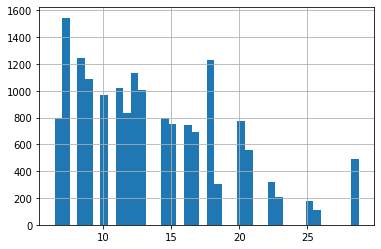

In [ ]:
df["int_rate"].hist(bins = 40);

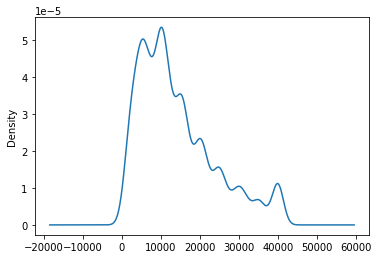

In [ ]:
df["funded_amnt"].plot.density();

# Statistical Tests

## One Sample TTest

In [26]:
df.sample(3)

,funded_amnt,installment,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,title,grade,fico_range_high,revol_util,mths_since_last_delinq,loan_status
2494,15350,477.91,36,7.56,Learning Game Designer,5,MORTGAGE,135.0,Credit card refinancing,A,749,30.7,NaN,Fully Paid
4473,2500,104.50,36,28.80,Sales,3,MORTGAGE,96.0,Debt consolidation,D,684,63.7,NaN,Fully Paid
715,12750,404.33,36,8.81,Clinical Initiatives Manager,6,RENT,78.0,Debt consolidation,A,694,55.4,NaN,Fully Paid


In [29]:
from scipy import stats
# sample income
mean = 89.684815
std = 134.466275
n = df.shape[0]

# US average income (Population "median income")
US_mean = 63.179

In [46]:
### Generate the random test scores with the specified mean, std, and sample size
#rvs = stats.norm.rvs(loc=mean,scale=std,size=16818, random_state=42)
#print('The mean of the sample: ', rvs.mean())
#print('The standard deviation of the sample: ', rvs.std())


### NULL HYPOTHISIS
# H0 = The mean annual income of Lending Club users is no differnt from the average 
# annual income of the population.

### ALTERNATIVE HYPOTHISIS
# H1 = The mean annual income of Lending Club users is differnt from the average 
# annual income of the population

### P Value ~ the probability that our result is statistically significant 
# alpha = .05 (significance level)

### CONCLUSION
# The pvalue is less than alpha. This means than we reject the null hypothesis.
# The average lending club member has a differnt income from the population.

alpha = .05
p_value = stats.ttest_1samp(df['annual_inc'], popmean=US_mean)[1]
stats.ttest_1samp(df['annual_inc'], popmean=US_mean)

Ttest_1sampResult(statistic=25.563184688364, pvalue=1.9450267726834557e-141)

In [50]:
p_value < alpha

True

In [31]:
### Calculating tvalue by hand
### t-value = (sample mean-population mean) / standard error.

t_statistic = (mean - US_mean) / (std/np.sqrt(n))
print('The t-statistic is: ', t_statistic)

The t-statistic is:  25.5631849607014


## Two Sample TTest

In [ ]:
### NULL HYPOTHISIS
# H0 = The mean annual income of mortgage owners is no differnt from the average 
# annual income of renters.

### ALTERNATIVE HYPOTHISIS
# H1 = The mean annual income of mortgage owners is differnt from the average 
# annual income of renters.

# alpha = .05 (significance level)

### CONCLUSION
# The pvalue is less than alpha. This means than we reject the null hypothesis.
# The mortgage owners annual income is differnt from renters .

In [36]:
mort= df[df['home_ownership'] == "MORTGAGE"]
rent= df[df['home_ownership'] == "RENT"]
print(rent.shape)
print(mort.shape)

(5668, 14)
(8988, 14)


In [41]:
rent.describe()
mean_1 = 98.297478
mean_2 = 77.601826
std_1 = 105.190037	
std_2 = 154.810901
n_1 = mort.shape[0]
n_2 = rent.shape[0]

In [51]:
alpha = .05
p_value = stats.ttest_ind(mort['annual_inc'], rent['annual_inc'])[1]
stats.ttest_ind(mort['annual_inc'], rent['annual_inc'])

Ttest_indResult(statistic=9.62993652629163, pvalue=6.938577308211866e-22)

In [52]:
p_value < alpha

True